# MDI 720 : Statistiques
## IntroStatisics
### *Joseph Salmon*

This notebook reproduces the pictures for the course "IntroStatics"

REM:
  - you need TeX install on your machine (otherwise errors could appends)
  - you need plot_species_kde.py in the same directory

In [5]:
# import packages
import numpy as np
import matplotlib.pyplot as plt  # for plots
from matplotlib import rc
import seaborn as sns
from os import mkdir, path
from scipy import stats
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from math import cos, sin, pi, sqrt
from statsmodels.nonparametric.kde import KDEUnivariate
from scipy.linalg import toeplitz
from numpy.linalg import eigh
sns.set_style("white")

In [6]:
# to get images in the notebook
%matplotlib inline 

# Plot initialization

In [7]:
dirname = "../prebuiltimages/"
if not path.exists(dirname):
    mkdir(dirname)

imageformat = '.pdf'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)
# some colors I'll use
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)

plt.close("all")

# Saving display function:

In [8]:
def my_saving_display(fig, dirname, filename, imageformat):
    """"Saving with personal function."""
    if saving is True:
        dirname + filename + imageformat
        image_name = dirname + filename + imageformat
        fig.savefig(image_name)
        

saving = False  # True

# Popular statistics:

In [9]:
mu, sigma, nb_samples = 1.5, 4, 8

# Random setting
np.random.seed(seed=2)
rgamma = np.random.gamma
X = rgamma(mu, sigma, nb_samples)  # Generate sample from a Gamma distribution
y = np.ones(nb_samples,)

# Various statistics:
meanX = np.mean(X)  # mean
minX = np.min(X)  # min
maxX = np.max(X)  # max
medX = np.median(X)  # median
MADX = np.median(np.abs(X - medX))  # mean absolute deviation
s = np.std(X)  # standard deviation

alpha_trim = 0.15
tmeanX = stats.trim_mean(X, alpha_trim)  # trimmed mean (level: alpha_trim)

## Empirical mean display:

REM: meaning of shortcuts such as lw (linewidth), ls (linestyle) etc., are available at: https://matplotlib.org/api/lines_api.html

/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


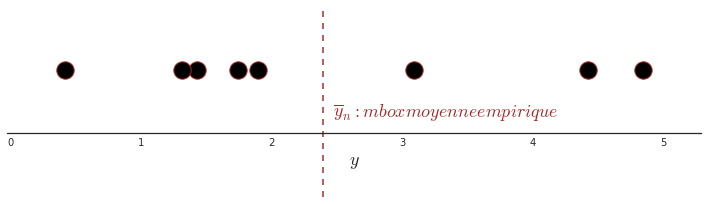

In [10]:
## Added for Python3
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
plt.rcParams["text.usetex"] = False
##

fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([meanX, meanX], [0, 1.5], color=brown, lw=1.5, ls="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\overline{y}_n : mbox{moyenne empirique}$',
             xy=(meanX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=brown)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSampleMean", imageformat)

# Empirical median display:

/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


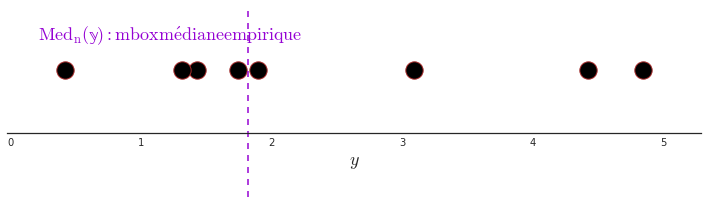

In [11]:
#plt.rcParams['font.family'] = 'Arial'

fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([medX, medX], [0, 1.5], color=purple, lw=1.5, ls="--")
plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(\mathbb{y}): mbox{m\'ediane empirique}$',
             xy=(medX, 1), xycoords='data', xytext=(-210, +30),
             textcoords='offset points', fontsize=18, color=purple)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSampleMediane", imageformat)

#  Trimmed mean (level: alpha_trim) display:


/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


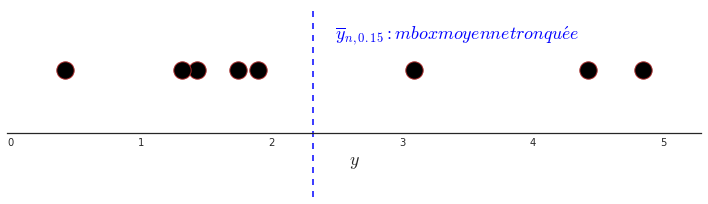

In [12]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([tmeanX, tmeanX], [0, 1.5], c='blue', lw=1.5, ls="--")
plt.xlabel(r'$y$', fontsize=18)
tt = "$\overline{y}_{n,%s} : mbox{moyenne tronqu\\'ee}$" % str(alpha_trim)
plt.annotate(tt, xy=(tmeanX, 1), xycoords='data', xytext=(+22, +30),
             textcoords='offset points', fontsize=18, color='blue')

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSampleTrimmed", imageformat)


#  Empirical mean / median/ trimmed mean :

/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


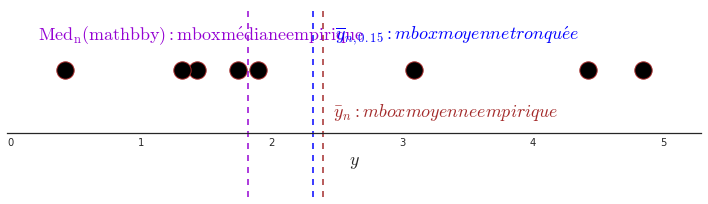

In [13]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')

ax.plot([meanX, meanX], [0, 1.5], color=brown, lw=1.5, ls="--")
ax.plot([medX, medX], [0, 1.5], color=purple, lw=1.5, ls="--")
ax.plot([tmeanX, tmeanX], [0, 1.5], color='blue',
        lw=1.5, ls="--")

plt.xlabel(r'$y$', fontsize=18)
plt.annotate(r'$\rm{Med}_n(mathbb{y}): mbox{m\'ediane empirique}$',
             xy=(medX, 1), xycoords='data', xytext=(-210, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\bar{y}_n : mbox{moyenne empirique}$', xy=(meanX, 0.4),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=18, color=brown)
plt.annotate(tt, xy=(tmeanX, 1), xycoords='data', xytext=(+22, +30),
             textcoords='offset points', fontsize=18, color='blue')

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSampleMedianeMean", imageformat)

# Standard deviation:

/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


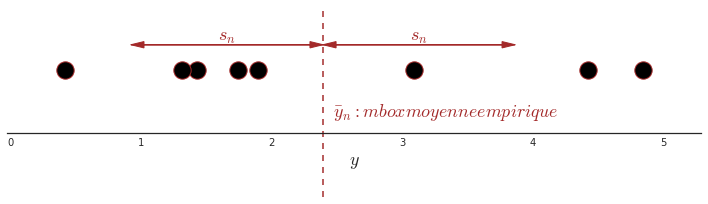

In [14]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([meanX, meanX], [0, 1.5], color=brown, lw=1.5, ls="--")

plt.arrow(meanX, 1.2, -s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX - s, 1.2, s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX, 1.2, s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)
plt.arrow(meanX + s, 1.2, -s, 0, fc=brown, ec=brown,
          head_width=0.05, head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)

plt.annotate(r'$\bar{y}_n : mbox{moyenne empirique}$',
             xy=(meanX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=brown)
plt.annotate(r'$s_n$', xy=(meanX + s * (0.4), 1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=18,
             color=brown)
plt.annotate(r'$s_n$', xy=(meanX - s * (0.6), 1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=18,
             color=brown)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaSD", imageformat)

# Mean Absolute Deviation:


/Users/clementtailleur/Documents/Telecom/Statistics/Py3_Statistics/lib/python3.6/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


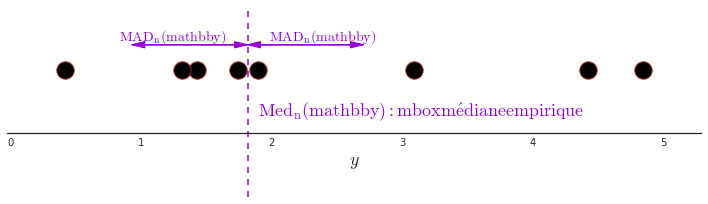

In [15]:
fig1, ax = plt.subplots(figsize=(10, 3))
ax.set_ylim(0, 1.5)
ax.set_xlim(minX - 0.1 * np.ptp(X), maxX + 0.1 * np.ptp(X))
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c='black', s=300, marker='o', edgecolors=brown, lw='1')
ax.plot([medX, medX], [0, 1.5], color=purple, lw=1.5, ls="--")

plt.arrow(medX, 1.2, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX - MADX, 1.2, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX, 1.2, MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)
plt.arrow(medX + MADX, 1.2, -MADX, 0, fc=purple, ec=purple, head_width=0.05,
          head_length=0.1, length_includes_head=True)

plt.xlabel(r'$y$', fontsize=18)

plt.annotate(r'$\rm{Med}_n(mathbb{y}): mbox{m\'ediane empirique}$',
             xy=(medX, 0.4), xycoords='data', xytext=(+10, +30),
             textcoords='offset points', fontsize=18, color=purple)
plt.annotate(r'$\rm{MAD}_n(mathbb{y})$', xy=(medX + MADX * (0.1), 1),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=14, color=purple)
plt.annotate(r'$\rm{MAD}_n(mathbb{y})$', xy=(medX - MADX * (1.2), 1),
             xycoords='data', xytext=(+10, +30), textcoords='offset points',
             fontsize=14, color=purple)

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "GammaMAD", imageformat)

# Histogram:

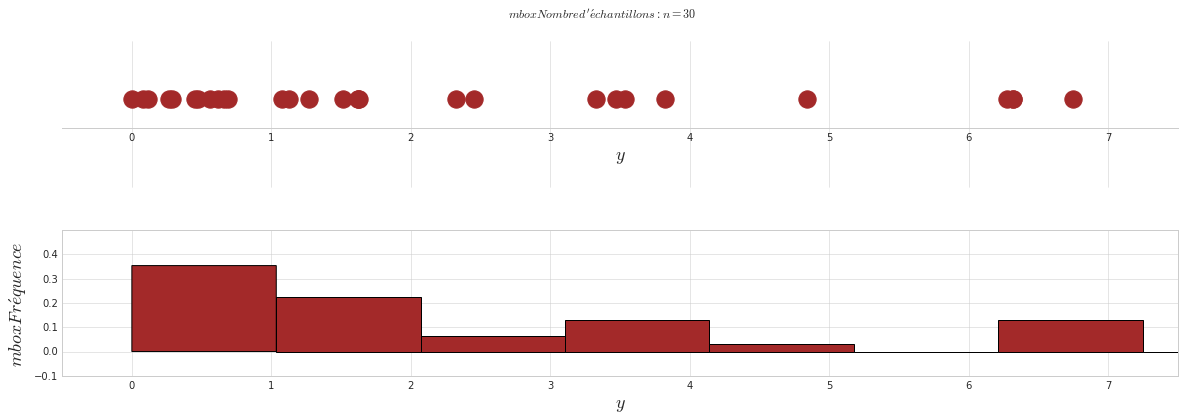

In [16]:
sns.set_style("whitegrid")
mu = 1
sigma = 3
nb_samples = 30

np.random.seed(seed=1)
rgamma = np.random.gamma
X = rgamma(mu, sigma, nb_samples)
y = np.ones(nb_samples,)

# Statistics:
meanX = np.mean(X)
minX = np.min(X)
maxX = np.max(X)
medX = np.median(X)
MADX = np.median(np.abs(X - medX))
s = np.std(X)
sorted_data = np.sort(X)

# Plot:
fig1 = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3)
ax1 = fig1.add_subplot(211)

yrange_lim_up = (-0.5, 2)
yrange_lim = (-0.1, 0.5)
xrange_lim = (-0.5, 7.5)

ax1.set_ylim(yrange_lim_up)
ax1.set_xlim(xrange_lim)

ax1.get_xaxis().tick_bottom()
ax1.axes.get_yaxis().set_visible(False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_position(('data', 0.5))
ax1.spines['left'].set_color('none')

ax1.scatter(X, y, c=brown, s=300, edgecolors=brown, marker='o')
plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"$mbox{Nombre d'\'echantillons}" + ":n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim)
plt.hist(X, bins=10, normed=True, align='mid', color=brown)
plt.ylabel(r'$mbox{Fr\'equence}$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)
plt.show()

my_saving_display(fig1, dirname, "GammaHist", imageformat)

# KDE:
(see https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/ for more details)

In [26]:
pdf_est

array([ 0.07479563,  0.0934096 ,  0.11423146,  0.13684499,  0.16065871,
        0.18493195,  0.20882044,  0.2314385 ,  0.25193151,  0.26955047,
        0.2837192 ,  0.29408518,  0.30054641,  0.30324989,  0.30256141,
        0.29901023,  0.29321666,  0.28581303,  0.27737015,  0.26833993,
        0.25902249,  0.24956157,  0.23996656,  0.23015549,  0.22000873,
        0.2094227 ,  0.19835285,  0.18683869,  0.17500794,  0.16306155,
        0.15124559,  0.13981828,  0.12902045,  0.11905601,  0.11008504,
        0.10222838,  0.09557922,  0.09021502,  0.08620376,  0.08360012,
        0.082431  ,  0.08267298,  0.08422772,  0.08690242,  0.09040211,
        0.09433837,  0.09825576,  0.10167314,  0.10413423,  0.10525926,
        0.10478944,  0.1026169 ,  0.09879545,  0.0935307 ,  0.08715137,
        0.08006651,  0.07271518,  0.06551576,  0.05882183,  0.05288992,
        0.04786262,  0.0437681 ,  0.04053492,  0.03801906,  0.03603864,
        0.03441116,  0.03298812,  0.03168239,  0.0304852 ,  0.02

In [25]:
sorted_data

array([  3.43144076e-04,   8.33088743e-02,   1.19513634e-01,
         2.66638600e-01,   2.90651615e-01,   4.53818759e-01,
         4.76128786e-01,   5.58375856e-01,   6.18343902e-01,
         6.62319672e-01,   6.86173223e-01,   1.08003826e+00,
         1.12811584e+00,   1.27192945e+00,   1.51635763e+00,
         1.61881751e+00,   1.62027314e+00,   1.63001811e+00,
         2.32187932e+00,   2.45402194e+00,   3.33024098e+00,
         3.46763913e+00,   3.53611050e+00,   3.82237576e+00,
         4.83950311e+00,   6.27185092e+00,   6.31409187e+00,
         6.31470893e+00,   6.75016760e+00,   1.03506816e+01])

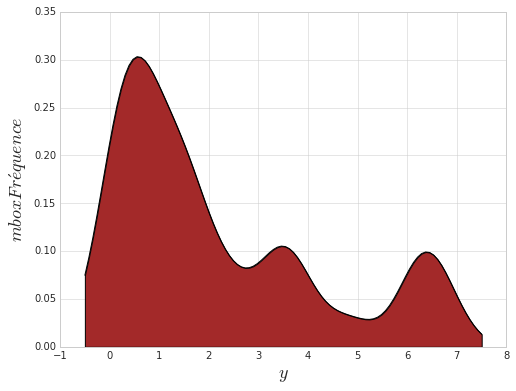

In [27]:
'''fig1 = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3)
ax1 = fig1.add_subplot(211)

ax1.set_ylim(yrange_lim_up)
ax1.set_xlim(xrange_lim)

ax1.get_xaxis().tick_bottom()
ax1.axes.get_yaxis().set_visible(False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_position(('data', 0.5))
ax1.spines['left'].set_color('none')

ax1.scatter(X, y, c=brown, s=300, edgecolors=brown, marker='o')
plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"$mbox{Nombre d'\'echantillons}" + ":n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim)'''

kde = KDEUnivariate(sorted_data)
kde.fit(bw=0.5, kernel='gau')
x_grid = np.linspace(xrange_lim[0], xrange_lim[1], 100)
pdf_est = kde.evaluate(x_grid)

plt.plot(x_grid, pdf_est, color='k')
plt.fill_between(x_grid, 0., pdf_est, facecolor=brown)
plt.ylabel(r'$mbox{Fr\'equence}$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)
plt.show()

#my_saving_display(fig1, dirname, "GammaKDE", imageformat)

# CDF / fonction de repartition:


In [ ]:
yrange_lim_down = (0., 1.)

fig1 = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)
ax.set_ylim(yrange_lim_up)
ax.set_xlim(xrange_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax.scatter(X, y, c=brown, s=300, edgecolors=brown, marker='o')
plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"$mbox{Nombre d'\'echantillons}" + ":n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)
plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'$mbox{Fr\'equence cumul\'ee}$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)
plt.show()

my_saving_display(fig1, dirname, "Gammaecdf", imageformat)

# Quantile function:

In [ ]:
fig1 = plt.figure(figsize=(20, 6))
plt.subplots_adjust(hspace=0.3)
ax = fig1.add_subplot(211)
ax.set_ylim(yrange_lim_up)
ax.set_xlim(xrange_lim)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0.5))
ax.spines['left'].set_color('none')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)
plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'$mbox{Fr\'equence cumul\'ee}$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)
ax.scatter(X, y, c=brown, s=300, edgecolors=brown, marker='o')
plt.xlabel(r'$y$', fontsize=18)
plt.suptitle(r"$mbox{Nombre d'\'echantillons}" + ":n={0}$".format(nb_samples),
             multialignment='center')

ax2 = fig1.add_subplot(212)
ax2.set_xlim(xrange_lim)
ax2.set_ylim(yrange_lim_down)

###############################################################################
# Quantile function: First value to display

p = 0.44
q = np.percentile(X, p * 100)

ax2.plot([q, xrange_lim[0]], [p, p], color=brown, lw=1.5, ls="--")
ax2.plot([q, q], [0, p], color=brown, lw=1.5, ls="--")
ax2.annotate(r'$p=%.2f$' % p, xy=(0, p), xycoords='data', xytext=(-23, +6),
             textcoords='offset points', fontsize=14, color=brown)
ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext=(-15, -30), textcoords='offset points', fontsize=16,
             color=brown)
###############################################################################
# Quantile function: Second value to display

p = 0.87
q = np.percentile(X, p * 100)

ax2.plot([q, xrange_lim[0]], [p, p], color=brown, lw=1.5, ls="--")
ax2.plot([q, q], [0, p], color=brown, lw=1.5, ls="--")
ax2.annotate(r'$p=%.2f$' % p, xy=(0, p), xycoords='data', xytext=(-23, +6),
             textcoords='offset points', fontsize=14, color=brown)
ax2.annotate(r'$F_n^\leftarrow(p)=%.2f$' % q, xy=(q, 0), xycoords='data',
             xytext=(-15, -30), textcoords='offset points',
             fontsize=14, color=brown)

plt.step(sorted_data, np.arange(sorted_data.size, dtype='float') / nb_samples,
         color=brown)
plt.ylabel(r'$mbox{Fr\'equence cumul\'ee}$', fontsize=18)
plt.xlabel(r'$y$', fontsize=18)

plt.show()
my_saving_display(fig1, dirname, "GammaQuantiles", imageformat)

# Bidimensional KDE

In [ ]:
#exec(open('plot_species_kde.py').read())
#my_saving_display(fig_kde, dirname, "KDE2D", imageformat)

# Correlations

In [ ]:
rng = np.random.RandomState(42)     # initializing randomness
n_samples = 90
sig_list = [-0.999, -0.8, -.4, 0, 0.4, 0.8, 0.999]
nb_sig = len(sig_list)

fig1 = plt.figure(figsize=(nb_sig, 1.5))
for i in range(nb_sig):
    rotation_matrix = np.array([[0, sig_list[i - 1]], [sig_list[i - 1], 0]])
    MySigma = np.eye(2, 2) + rotation_matrix
    X = rng.multivariate_normal(np.array([0, 0]), MySigma, n_samples)
    ax = fig1.add_subplot(1, nb_sig, i + 1)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.scatter(X[:, 0], X[:, 1], marker='o', c=brown, s=2, edgecolors=brown)
    plt.title(r" ${:.3f}$".format(sig_list[i - 1]))  # Print 3 digits
plt.tight_layout()
plt.show()
my_saving_display(fig1, dirname, "Correlations2Dessins", imageformat)

In [ ]:
rng = np.random.RandomState(42)
n_samples = 90
theta_list = [np.pi * 1 / 16, np.pi * 2 / 16, np.pi * 3 / 16, np.pi * 4 / 16,
              np.pi * 5 / 16, np.pi * 6 / 16, np.pi * 7 / 16]
nb_theta = len(theta_list)

fig1 = plt.figure(figsize=(nb_theta, 1.5))
D = np.diag([1, 0])
for i in range(nb_theta):
    theta = theta_list[i]
    P = np.array([[np.cos(theta), np.sin(theta)],
                 [-np.sin(theta), np.cos(theta)]])
    MySigma = (P.dot(D)).dot(P.T)
    X = rng.multivariate_normal(np.array([0, 0]), MySigma, n_samples)
    ax = fig1.add_subplot(1, nb_theta, i + 1)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.scatter(X[:, 0], X[:, 1], c=brown, s=2, edgecolors=brown, marker='o')
    ax.set_ylim(-3, 3)
    ax.set_xlim(-3, 3)
    corr_mat = np.corrcoef(X[:, 0], X[:, 1])
    plt.title(r"${:.3f}$".format(corr_mat[0, 1]))

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "Correlations2Dessins_bis", imageformat)

In [ ]:
rng = np.random.RandomState(42)

fig1 = plt.figure(figsize=(nb_theta, 1.5))
for i in range(nb_theta):
    theta = -theta_list[i]
    P = np.array([[np.cos(theta), np.sin(theta)],
                 [-np.sin(theta), np.cos(theta)]])
    MySigma = (P.dot(D)).dot(P.T)
    X = rng.multivariate_normal(np.array([0, 0]), MySigma, n_samples)
    ax = fig1.add_subplot(1, nb_theta, i + 1)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.scatter(X[:, 0], X[:, 1], c=brown, s=2, edgecolors=brown, marker='o')
    ax.set_ylim(-3, 3)
    ax.set_xlim(-3, 3)
    corr_mat = np.corrcoef(X[:, 0], X[:, 1])
    corr_mat[0, 1]
    plt.title(r"${:.3f}$".format(corr_mat[0, 1]))

plt.tight_layout()
plt.show()

my_saving_display(fig1, dirname, "Correlations2Dessins_bis_pos", imageformat)

#  Zero correlation:  Gaussian Mixtures


In [ ]:
rng = np.random.RandomState(42)
n_samples = 100

fig1, ax = plt.subplots(figsize=(3, 3))
MySigma = 0.01 * np.eye(2, 2)
X1 = rng.multivariate_normal(np.array([0, 1]), MySigma, n_samples)
X2 = rng.multivariate_normal(np.array([1, 0]), MySigma, n_samples)
X3 = rng.multivariate_normal(np.array([1, 1]), MySigma, n_samples)
X4 = rng.multivariate_normal(np.array([0, 0]), MySigma, n_samples)
Z = np.vstack((X1, X2))
Y = np.vstack((X3, X4))
X = np.vstack((Z, Y))
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.scatter(X[:, 0], X[:, 1], color=brown, s=2, edgecolors=brown, marker='o')
ax.set_ylim(-1, 2)
ax.set_xlim(-1, 2)
corr_mat = np.corrcoef(X[:, 0], X[:, 1])
debut_titre = r"$mbox{Corr\'elation }$"
plt.title(debut_titre + r"$ = %.3f$" % corr_mat[0, 1])
plt.show()

my_saving_display(fig1, dirname, "Correlations_4MixtGauss", imageformat)


#  Zero correlation: Circle


In [ ]:
rng = np.random.RandomState(42)
n_samples = 400

fig1, ax = plt.subplots(figsize=(3, 3))
MySigma = 0.01 * np.eye(2, 2)
r = 0.8 + 0.4 * rng.rand(1, n_samples)
thetas = 2 * np.pi / n_samples * np.arange(n_samples)
P = (np.array(np.vstack((np.cos(thetas), np.sin(thetas))))).T
X1, X2 = r * P[:, 0], r * P[:, 1]
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.scatter(X1, X2, color=brown, s=2, edgecolors=brown, marker='o')
ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)
corr_mat = np.corrcoef(r * P[:, 0], r * P[:, 1])
debut_titre = r"$mbox{Corr\'elation }$"
plt.title(debut_titre + r"$ = %.3f$" % corr_mat[0, 1])
plt.show()

my_saving_display(fig1, dirname, "Correlations_Cercle", imageformat)

# Zero correlation: Square

In [ ]:
rng = np.random.RandomState(42)
n_samples = 400

fig1, ax = plt.subplots(figsize=(3, 3))
X1 = rng.rand(1, n_samples)
X2 = rng.rand(1, n_samples)

ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.scatter(X1, X2, color=brown, s=2, edgecolors=brown, marker='o')
ax.set_ylim(-1, 2)
ax.set_xlim(-1, 2)
corr_mat = np.corrcoef(X1, X2)
debut_titre = r"$mbox{Corr\'elation }$"
plt.title(debut_titre + r"$ = %.3f$" % corr_mat[0, 1])
plt.show()

my_saving_display(fig1, dirname, "Correlations_Carre", imageformat)

# Scatter plot:

In [ ]:
sns.set_style("white")
iris = sns.load_dataset("iris")
# Next two lines needed for avoiding underscore issues in printing with tex...
iris_df = pd.DataFrame(iris)
iris_df.columns = ['sepal length', 'sepal width', 'petal length',
                   'petal width', 'species']

g = sns.PairGrid(iris_df, hue="species", palette="colorblind")
g.map(plt.scatter, color='white')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='center right', ncol=1)
g.fig.subplots_adjust(left=0.08, right=0.85)

# See http://seaborn.pydata.org/tutorial/axis_grids.html for more details
# on seaborn

my_saving_display(plt, dirname, "scatter_matrix", imageformat)

# Spectral decomposition

In [ ]:
A = toeplitz([1, 2, 0, 2])
[Dint, Uint] = eigh(A)  # use eigh not eig for symmetric matrices

idx = Dint.argsort()[::-1]
D = Dint[idx]
U = Uint[:, idx]

print(np.allclose(U.dot(np.diag(D)).dot(U.T), A))

# Gaussian probability density (pdf)


In [ ]:
x = np.linspace(-3., 3.)
sigma2, mu = 1, 0
fig1, ax = plt.subplots(figsize=(10, 3))
plt.plot(x, stats.norm.pdf(x, mu, sqrt(sigma2)), lw=2, c=brown,
         label=r"$\varphi_{0,1}$")
plt.legend()
plt.show()

my_saving_display(fig1, dirname, "standardNorm", imageformat)


# Multiple Gaussian probability density (pdf): mean varying

In [ ]:
x = np.linspace(-5., 5.0, num=200)
sigma2 = 1
mu_tabs = [-2., -1., 0., 1.]


for i, mu in enumerate(mu_tabs):
    fig2, ax1 = plt.subplots(figsize=(10, 3))
    plt.plot(x, stats.norm.pdf(x, mu, sqrt(sigma2)), lw=2,
             label=r'$\mu={0}, \sigma^2={1} $'.format(mu, sigma2))
    plt.legend()
    plt.show()
    my_saving_display(fig2, dirname, "standardNorm_multiple_bis" + str(i),
                      imageformat)

# Multiple Gaussian probability density (pdf): variance varying

In [ ]:
sigma2_tabs = [0.2, 0.5, 1, 2, 5]  # Beware: for stats.norm std is required!

In [ ]:
for i, sigma2 in enumerate(sigma2_tabs):
    fig2, ax1 = plt.subplots(figsize=(10, 3))
    ax.set_ylim(0, 1)
    plt.plot(x, stats.norm.pdf(x, 0, sqrt(sigma2)), lw=2,
             label=r'$\mu={0},\quad   \sigma^2={1} $'.format(mu, sigma2))
    plt.legend()
    plt.show()
    my_saving_display(fig1, dirname, "standardNorm_multiple" + str(i),
                      imageformat)

# Gaussian probability density funciton in 2D:

In [ ]:
def covmat_to_scalar(sigma):
    """Convert covariance matrix to scalars."""
    sigmax = np.sqrt(sigma[0, 0])
    sigmay = np.sqrt(sigma[1, 1])
    sigmaxy = sigma[1, 0]
    return sigmax, sigmay, sigmaxy


def angle_scalar_to_covmat(theta, sig1, sig2):
    """Inverse function of the previous one."""
    rotation = np.zeros((2, 2))
    rotation[0, 0] = cos(theta)
    rotation[1, 0] = -sin(theta)
    rotation[0, 1] = sin(theta)
    rotation[1, 1] = cos(theta)
    sigma = rotation.dot(np.diag([sig1 ** 2, sig2 ** 2])).dot(rotation.T)
    return sigma


In [ ]:
step = 200
mean_1 = [0, 0]

# Plot isotropic case:

In [ ]:
sig0 = np.sqrt(3)
xx = np.linspace(-10, 10, step)
yy = xx
Xg, Yg = np.meshgrid(xx, yy)
Z2_bis = plt.mlab.bivariate_normal(Xg, Yg, sigmax=sig0, sigmay=sig0,
                                   mux=mean_1[0], muy=mean_1[1], sigmaxy=0.0)

fig1 = plt.figure(dpi=90)
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Z2_bis, cmap='Oranges', rstride=3, cstride=3,
                alpha=0.95, lw=0.5, edgecolors='k')
ax.set_zlim(0, 0.06)
plt.show()

my_saving_display(fig1, dirname, "iso_gaussian", imageformat)


# Plot anisotropic case:

In [ ]:
sig1 = 1.
sig2 = 3.
thetas = [0., pi / 5., 2. * pi / 5., 3. * pi / 5., 4. * pi / 5.]

for i, theta in enumerate(thetas):

    sig = angle_scalar_to_covmat(theta, sig1, sig2)
    sigx, sigy, sigxy = covmat_to_scalar(sig)
    Z2_ter = plt.mlab.bivariate_normal(Xg, Yg, sigmax=sigx, sigmay=sigy,
                                       mux=mean_1[0], muy=mean_1[1],
                                       sigmaxy=sigxy)
    fig1 = plt.figure(dpi=90)
    ax = fig1.add_subplot(111, projection='3d')
    ax.plot_surface(Xg, Yg, Z2_ter, cmap='Oranges', rstride=3, cstride=3,
                    alpha=0.95, lw=0.5, edgecolors='k')
    ax.set_zlim(0, 0.06)
    plt.show()
    my_saving_display(fig1, dirname, "aniso_gaussian" + str(i), imageformat)

# Testing Cholevsky decomposition in Numpy:

In [ ]:
A = np.random.randn(4, 4)
B = np.dot(A, np.transpose(A))
np.linalg.det(B)  # semi definite positive then
L = np.linalg.cholesky(B)
print(L.dot(L.T) - B)  # should be close to zero, right?